In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "../data/Womens Clothing E-Commerce Reviews.csv"

df = pd.read_csv(file_path)

print("--- First 5 Rows ---")
print(df.head())

print("\n--- DataFrame Info ---")
df.info()

print("\n--- Missing Values Count ---")
print(df.isnull().sum())

--- First 5 Rows ---
   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate 

In [2]:
print(f"Original Shape of the dataframe: {df.shape}")

df.dropna(subset=['Review Text'], inplace =  True)

print(f"Shape of the dataframe after dropping missing reviews: {df.shape}")

print("\n--- Missing Values Count After Dropping ---")
print(df.isnull().sum())

Original Shape of the dataframe: (23486, 11)
Shape of the dataframe after dropping missing reviews: (22641, 11)

--- Missing Values Count After Dropping ---
Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64


--- Sentiment Distribution ---
sentiment
1    17448
0     2370
Name: count, dtype: int64


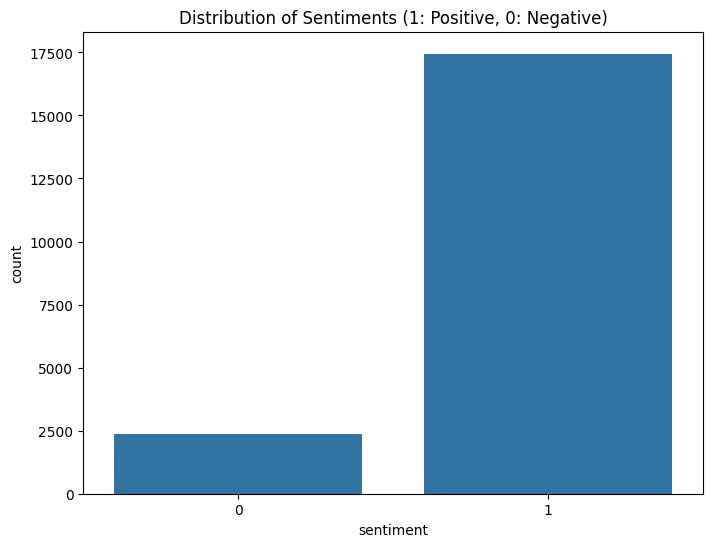

In [3]:
df = df[df['Rating'] != 3]
df['sentiment'] = df['Rating'].apply(lambda rating: 1 if rating > 3 else 0)

print("--- Sentiment Distribution ---")
print(df['sentiment'].value_counts())

plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data = df)
plt.title('Distribution of Sentiments (1: Positive, 0: Negative)')
plt.show()

In [4]:
import nltk
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]','',text)
    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        if token not in stop_words:
            cleaned_tokens.append(lemmatizer.lemmatize(token))
    return " ".join(cleaned_tokens)

df['cleaned_text'] = df['Review Text'].apply(preprocess_text)

print("\n--- Text Preprocessing Example ---")
print("Original Text: ", df['Review Text'].iloc[0])
print("Cleaned Text: ", df['cleaned_text'].iloc[0])

print("\n--- DataFrame Head with Cleaned Text ---")
print(df[['Review Text','cleaned_text','sentiment']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sauma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sauma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sauma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Sauma\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.



--- Text Preprocessing Example ---
Original Text:  Absolutely wonderful - silky and sexy and comfortable
Cleaned Text:  absolutely wonderful silky sexy comfortable

--- DataFrame Head with Cleaned Text ---
                                         Review Text  \
0  Absolutely wonderful - silky and sexy and comf...   
1  Love this dress!  it's sooo pretty.  i happene...   
3  I love, love, love this jumpsuit. it's fun, fl...   
4  This shirt is very flattering to all due to th...   
5  I love tracy reese dresses, but this one is no...   

                                        cleaned_text  sentiment  
0        absolutely wonderful silky sexy comfortable          1  
1  love dress sooo pretty happened find store im ...          1  
3  love love love jumpsuit fun flirty fabulous ev...          1  
4  shirt flattering due adjustable front tie perf...          1  
5  love tracy reese dress one petite foot tall us...          0  


In [5]:
from sklearn.model_selection import train_test_split

X = df['cleaned_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(f"Size of training set: {len(X_train)}")
print(f"Size of testing set: {len(X_test)}")

Size of training set: 15854
Size of testing set: 3964


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = vectorizer.fit_transform(X_train)

X_test_tfidf = vectorizer.transform(X_test)

print("Shape of the training TF-IDF matrix:", X_train_tfidf.shape)
print("Shape of the testing TF-IDF matrix:", X_test_tfidf.shape)

Shape of the training TF-IDF matrix: (15854, 5000)
Shape of the testing TF-IDF matrix: (3964, 5000)


In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

print("Training the model...")
model.fit(X_train_tfidf, y_train)
print("Model training complete!")

Training the model...
Model training complete!


In [8]:
y_pred = model.predict(X_test_tfidf)

In [9]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\n--- Classification Report ---")
print(classification_report(y_test,y_pred,target_names=['Negative (0)', 'Positive (1)']))

Accuracy: 0.9251

--- Classification Report ---
              precision    recall  f1-score   support

Negative (0)       0.85      0.46      0.59       478
Positive (1)       0.93      0.99      0.96      3486

    accuracy                           0.93      3964
   macro avg       0.89      0.72      0.78      3964
weighted avg       0.92      0.93      0.91      3964



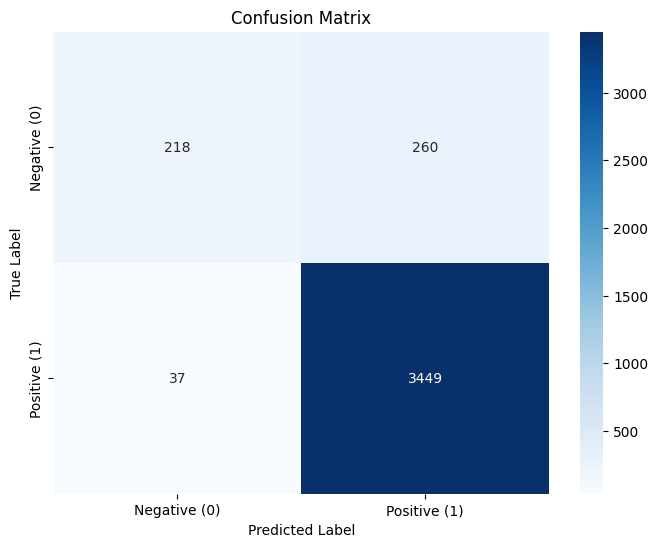

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot= True, fmt='d',cmap='Blues',xticklabels=['Negative (0)', 'Positive (1)'], yticklabels=['Negative (0)','Positive (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()